# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory (سطحى أو ظاهرى ، يعنى غير متعمق) investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**HINT:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [20]:
# TODO: Total number of records
n_records = data.shape[0] # also i could do len(data)

# TODO: Number of records where individual's income is more than $50,000
# dummy_var = data['income']=='<=50K' i used this to see the data type naming of the return value (seen this in the variable inspector)
n_greater_50k = len(data[data['income']=='<=50K']) 

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income']=='>50K']) 

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100 * n_at_most_50k / n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)) # i added ":.2f" inside the {} to force the output to two decimal places

Total number of records: 45222
Individuals making more than $50,000: 34014
Individuals making at most $50,000: 11208
Percentage of individuals making more than $50,000: 24.78%


- my notes: <br>
  -  `data['income']=='<=50K'` is a series of Trues and Falses. True at the index of `income` column where this index has the string `<=50K` and false otherwise.
  - `data[data['income']=='<=50K']` returns the data frame data , where the inside expression is true (i.e the df records only if the `income` column has the string `<=50K`)
  - I used `print(...)` to see the return of each of following elements to build intuition gradually : `data`, `data['income']`, `data['income']=='<=50K'` , and `data[data['income']=='<=50K']`
- Questions: 
    - what is the difference between len(df) and df.shape[0]
    - how exactly does len operate (return) ? is it always the number of rows or the largest between the rows and the columns?

** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

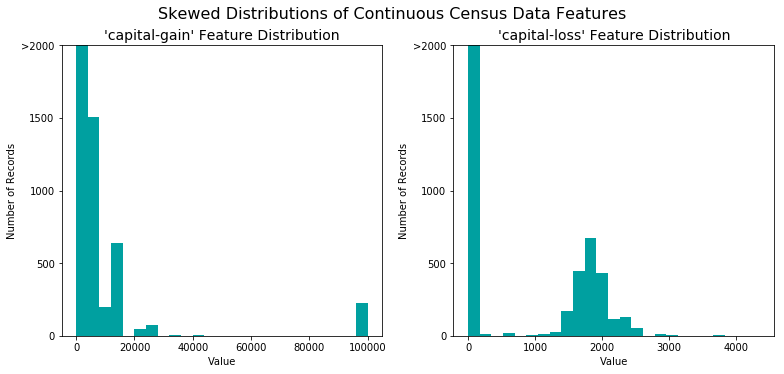

In [21]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1) # look at drop in -> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html, 
# also i want to see how i may want to drop a row (using axis=0)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

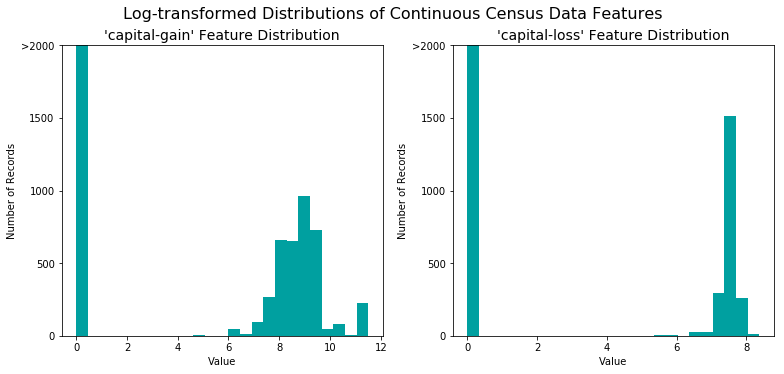

In [22]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

هو اللى أنا لاحظته إن اللى حصل بعد أخذ اللوغارتم إن المحور الأفقى بس هو اللى الفيم بتاعها بقت صغيرة. <br>
و لسة أنا عاوز أفهم الكود السابق

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [24]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [58]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)  #notes below

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# me adding
print("remember, it was {} total features BEFORE one-hot encoding.".format(len(features_log_minmax_transform.columns)))

# Uncomment the following line to see the encoded feature names
#print (encoded)
#print (income)

103 total features after one-hot encoding.
remember, it was 13 total features BEFORE one-hot encoding.


- my notes : <br>
    - recall that  `income` is dropped the df, thats why this `data['income']=='<=50K'` gives error
    - also `income = income_raw =='>50K'` does not give the desired result, since `income` will be series of Trues and Falses
    - the function `apply(...)` (from pandas) takes a function , and returns the result of applying this function on the calling df , see it here -> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
    - note that the calling df do not change, but the whole expressiong `df.apply(...)` returns the result
    - `lambda x: 1 if x == '>50K' else 0` is an on the fly function 
        - the function has no name 
        - the func takes any number of args, usually it is one arg, so the norm is to call it`x`
        - the body of the function is after the `:` which is basically the return of the function.
- Questions:
    - for the function passed to the apply(....)
        - Q\ must it be always a lambda function?
        - I want to do the same thing with a normal function (not a lambda function) and see if it works (i may also search online and ask the mentors)

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [61]:
# Import train_test_split
from sklearn.model_selection import train_test_split # my note : sklearn.cross_validation module has been deprecated in favor of the model_selection module

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. <font color=red>Q\ why? what about if the number of samples of each of the two classes are not balanced (which i think is the case here)?!</font>  <font color=blue> this will be addressed shortly :D </font> Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental (ضار أو مؤذ) to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \\$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points). <font color=blue>-> $\frac{True \;Positives \;+\; True Negatives}{all \; predictions \;(i.e \; True \; Positives \; + \; True \; Negatives \;+\; False \;Positves\;+ \;False \; Negatives\;)}$ </font>

**Precision** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classification), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]` <font color=blue>-> $\frac{True \;Positives}{True \;Positives \;+\; False\; Positives}$ </font> 

**Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of 

`[True Positives/(True Positives + False Negatives)]` <font color=blue>-> $\frac{True \;Positives}{True \;Positives \;+\; False\; Negatives}$ </font> 

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.
- my note:
    - this is not naive bayes, however, this is the realy naive model that has one answer /one prediction: all data is positive (1) 

**Please note** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

**HINT:** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [62]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # me : All rows - TP

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

accuracy = (TP + TN) /(TP + TN + FP + FN) # or TP / n_records
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta=0.5
fscore = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**HINT:**

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer:** <br>
- **1- Gaussian Naive Bayes (GaussianNB)** <br> <br>
    - **Real-world application in industry**
        -  Classify a person’s cognitive activity, based on brain image.
        - Multi-class Prediction: This algorithm can predict the posterior probability of multiple classes of the target variable.
        - Recommendation System: Naive Bayes Classifier along with algorithms like Collaborative Filtering makes a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not.
    - **Strengths**
        - really easy to implement
        - good handling for lots of features (scales well)
        - simple to run (efficient)
        - Real-time Prediction: As Naive Bayes is super fast, it can be used for making predictions in real time.
    - **Weaknesses**
        - it can break! it can sometimes give wrong result since it naively assumes that the features are independent. this happens particularly if two (or more) features are highly corrolated. So, for example, the model can learn that you love sunset and orange juice, but you hate to drink orange juice during sunset!
    - **What makes it a good candidate**
        - since we have lots of features (103) a super fast algorithm like naive bayes is very desirable
        - this model is usful for when the input data is continuous (not discrete, where we would use multinomialNB), and our data is mostly continous
    - **Refrences**
        - http://www.cs.cmu.edu/~tom/10601_sp09/lectures/NBayes2_2-2-2009-ann.pdf
        - YouTube : Udacity - Naive Bayes Strengths and Weaknesses : https://www.youtube.com/watch?v=nfbKTrufPOs
        - https://medium.com/@Mandysidana/machine-learning-types-of-classification-9497bd4f2e14
        - https://www.quora.com/What-is-the-difference-between-the-the-Gaussian-Bernoulli-Multinomial-and-the-regular-Naive-Bayes-algorithms<br><br>
        
- **2- Random Forest** <br> <br>
    - **Real-world application in industry**
        - The random forest algorithm is used in a lot of different fields, like Banking, Stock Market, Medicine and E-Commerce. 
            - In Banking it is used for example to detect customers who will use the bank’s services more frequently than others and repay their debt in time. In this domain it is also used to detect fraud customers who want to scam the bank. 
            - In finance, it is used to determine a stock’s behaviour in the future. 
            - In the healthcare domain it is used to identify the correct combination of components in medicine and to analyze a patient’s medical history to identify diseases. 
            - And lastly, in E-commerce random forest is used to determine whether a customer will actually like the product or not.
    - **Strengths**
        - overcome the overfitting problem that may happen when using a single tree
        - (an advantage of trees) the graphs of the trees makes it easy to interpret and understand for humans. (much better than, say, svm) 
        -  extremely flexible and have very high accuracy
        - Maintains accuracy even when a large proportion of the data are missing. also works even if the data is unbalanced
        - can be used for both regression and classification tasks
        
    - **Weaknesses**
        - large number of trees can make the algorithm to slow and ineffective for real-time predictions. In general, these algorithms are fast to train, but quite slow to create predictions once they are trained. A more accurate prediction requires more trees, which results in a slower model. In most real-world applications the random forest algorithm is fast enough, but there can certainly be situations where run-time performance is important and other approaches would be preferred
        - And of course Random Forest is a predictive modeling tool and not a descriptive tool. That means, if you are looking for a description of the relationships in your data, other approaches would be preferred. Q\ what is the difference between these two types of tools?(i need examples)
    - **What makes it a good candidate**
        - will give us good generalization (although
    - **Refrences**
        - https://www.quora.com/What-are-the-advantages-and-disadvantages-for-a-random-forest-algorithm
        - https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd
        - http://blog.citizennet.com/blog/2012/11/10/random-forests-ensembles-and-performance-metrics <br><br>
- **3- Support Vector Machines (SVM)** <br><br>
    - **Real-world application in industry**
        - <u>Face detection</u> – SVMc classify parts of the image as a face and non-face and create a square boundary around the face.
            - It classifies the parts of the image as face and non-face. It contains training data of n x n pixels with a two-class face (+1) and non-face (-1). Then it extracts features from each pixel as face or non-face. Creates a square boundary around faces on the basis of pixel brightness and classifies each image by using the same process.
        - other applications include :
            - <u>Handwriting recognition</u> – We use SVMs to recognize handwritten characters used widely.
            - Generalized predictive control(GPC) – Use SVM based GPC to control chaotic dynamics with useful parameters.
            - Text and hypertext categorization – SVMs allow Text and hypertext categorization for both inductive and transductive models. They use training data to classify documents into different categories. It categorizes on the basis of the score generated and then compares with the threshold value.
            - Classification of images – Use of SVMs provides better search accuracy for image classification. It provides better accuracy in comparison to the traditional query-based searching techniques.
            - Bioinformatics – It includes protein classification and cancer classification. We use SVM for identifying the classification of genes, patients on the basis of genes and other biological problems. Protein fold and remote homology detection – Apply SVM algorithms for protein remote homology detection.
            
    - **Strengths**
        - work really well when there is clear margin of seperation between the classes
        - Can model non-linear decision boundaries, and there are many kernels to choose from. so with an appropriate kernel function, we can solve any complex problem.
        - They are also fairly robust against overfitting, especially in high-dimensional space.
        - SVM’s are very good when we have no idea on the data.
    - **Weaknesses**
        - bad at large dataset because it will be slow ( training complexity is $O(n^3)$ where n is the size of the dataset )
        - bad if there is noise , i.e when there is overlapping between the classes (that's where a naive bayes would do better).
        - Choosing a “good” kernel function is not easy.
        - Difficult to understand and interpret the final model, variable weights and individual impact.
    - **What makes it a good candidate**
        - If there is a clear separation in our data, SVM will give us the most approriate boundary, and i want to see that
    - **Refrences**
        - https://data-flair.training/blogs/applications-of-svm/
        - https://elitedatascience.com/machine-learning-algorithms
        - Youtube: Udacity - SVM Strengths and Weaknesses : https://www.youtube.com/watch?v=U9-ZsbaaGAs
        - https://statinfer.com/204-6-8-svm-advantages-disadvantages-applications/
        - https://www.datasciencecentral.com/profiles/blogs/real-life-applications-of-support-vector-machines

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [77]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on # my note: i think it os the object of the learning algorithm
       - sample_size: the size of samples (number) to be 
                      drawn (يتسحب ، ولسة هشوف هو بيعمل كدا ليه، يعنى ليه بياخد سامبل أصلا و مش بيشتغل على الداتا كلها؟) from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}  # my note: "Curly Braces" are used in Python to define a dictionary.
    
    # TODO: Fit the learner to the training data using 
    #       slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit( X_train[:sample_size], y_train[:sample_size] ) # see me down playing with the slicing concept
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = start - end   #Q\ هل لازم الأراى و الديكشينارى نعملهم إنشلايزيشن قبل ما نستخدمهم زى ما هم بيعملوا دايما؟ هجرب دلوقت و أشيل الإنشلايزيشن و أشوف هيعطر إيررور ولا لأ
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300:])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = start - end
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5) # Q\ is it okay to ignore the third parameter "average" that is in the fbeta_score function, and jump directly and assign the fourth parameter ?
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results


In [76]:
# me playing with slicing ,, you can see it here ->https://www.pythoncentral.io/how-to-slice-listsarrays-and-tuples-in-python/
a=[1,2,3,4,5,6,7,8]
print(a)
print (a[::]) # same as previous because the default values are the following
print (a[0:len(a):1]) # i.e start at index 0 of the array until before index len(a)=8  (i.e until index 7, which is the 
# last index in the array), and increment one by one
print (len(a))
print (a[::2])
print (a[:3:]) # print from index 0 to index 3-1 =2
print (a[::-1]) # incerementing backward is the same as the reverese of the array 

[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
8
[1, 3, 5, 7]
[1, 2, 3]
[8, 7, 6, 5, 4, 3, 2, 1]


### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 36177 samples.


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 361 samples.
SVC trained on 3617 samples.


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 36177 samples.


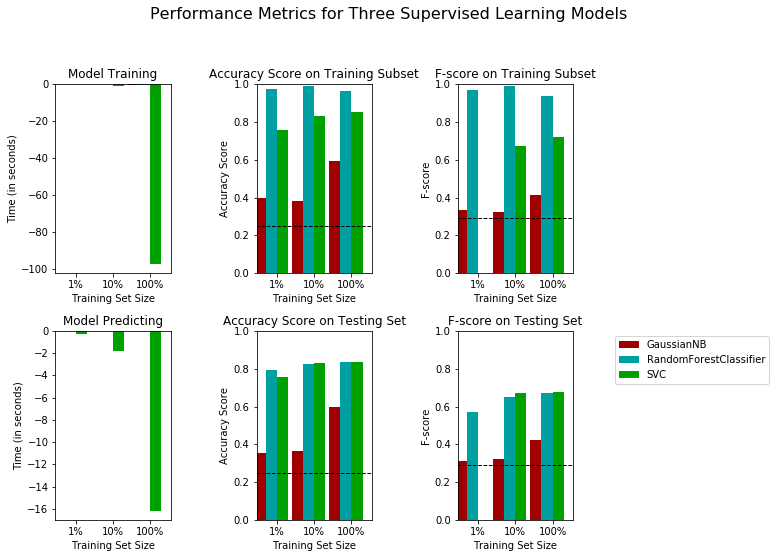

In [79]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state=3)
clf_C = SVC(random_state=3)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)  # also could say len(y_train) // 10  (since / is for float division, and // for integer divions) 
samples_1 = int(len(y_train)/100) # also could say len(y_train) // 100  (look at -> https://stackoverflow.com/questions/1535596/what-is-the-reason-for-having-in-python)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

أعتقد كلهم وحشين لإن حتى الأدق فيهم (سبورت فيكتور ماشين) بياخد وقت طويل ! أعتقد من بحثى ، كان المفرض أشتغل (بالجرادينت بوستينج) ، بس المشكلة أنا ماخترتوش لإن مدرسناهوش 
و معرفش عنه حاجة!!ز
i may also look at : https://medium.com/@aravanshad/gradient-boosting-versus-random-forest-cfa3fa8f0d80 <br>
also look at the advantages and disadantages of trees form the scikit learn site it self !! (it provides lots of points): https://scikit-learn.org/stable/modules/tree.html 

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

**HINT:** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer:** <br>
- I will choose **Random Forests** 
- although it appears to be overfitting (training data is almost memorized), it has 2nd highest f-score at 100% with very slight margin from the 1st model (SVM), however, I choose Random Forests because it has drastically less time in training and predicting than SVM. I think with tuning the model better, I will be able to raise the f-score and decrease overfitting.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

**HINT:**

When explaining your model, if using external resources please include all citations.

**Answer:** <br>
- before I demonstrate what a random forest is, I have to tell you what is a **decision tree** (the building block of a random forest)
    - Decision tree is a term used to name a predictive algorithm in machine learning, it basically asks lots of consecutive questions until it reaches to the answer.
    - each asnwers opens doors for many other questions that the algorith may ask to reach the answer, so these set of questions make up a graph like tree (several paths)
    - so for example, If i want to know the type of movies you like, I may ask you do you like movies from western culture or eastern culture? and depending on your answer I will further ask you more questions to narrow down your movies' prefrences. 
- **random forsts** is bascially a number of trees, each tree has different set of questions.
    - since some trees may have not-so-good set of questions, we use random forest to take the best of each tree. this way we end up with a stronger model that can reach answers better.
    - the decision trees are constructed in the random forest as follows :
        - Choose the number of trees you’d like in your forest (M)
        - Choose the number of samples you’d like for each tree (n)
        - Choose the number of features you’d like in each tree (f)
        - For each tree in M:
            - Select n samples with replacement from all observations
            - Select f features at random
            - Train a decision tree using the data set of n samples with f features
            - Save the decision tree
    - choosing the answer from the trees can be made using several methods, such as bagging (averaging the multiple results from all trees) or voting (choosing the asnwer that was chosen by most trees)
    
**references**<br>
https://www.datascience.com/blog/random-forests-decision-trees-ensemble-methods <br>
https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

my note : In layman's terms means using language that is not jargon, that is not specific to a particular domain or area of activity. So when your manager tells you that the organization is having ongoing issues with horizontal integration, you can express this in layman's terms as 'different departments are still not communicating well.'

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available! <font color=red>Q\ Why?</font>
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [81]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=3)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {  'n_estimators': [100, 150, 200],
                'max_depth': np.arange(2,10,2), 
                'min_samples_leaf': [3, 5, 10],
                'bootstrap': [True, False]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj =  GridSearchCV(clf, parameters, scoring=scorer) # my note: this is just an object that holds the attributes of the grid search, 
                                                          # the actual grid search results will be found next in the object 
                                                          # "grid_fit" which has the return of fitting the GridSearch obj on our           
                                                          # training data

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit= grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and optimized models
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8381
F-score on testing data: 0.6724

Optimized Model
------
Final accuracy score on the testing data: 0.8500
Final F-score on the testing data: 0.7168


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |       0.83        |       0.85      |
| F-score        |       0.67        |       0.72      |


**Answer:** <br>
- optimized model testing scores:
    - accuracy = 0.85
    - F-score = 0.72
- Those scores are obviously better than the unoptimized scores.
- accuracy= 0.25 and F-score=0.30 which means we have succeeded to make a better model (better than random guessing)

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:** <br>
- **(1) capital gain (2) capital loss :**
    - the financial statues plays a role in making people go to philanthropy (the more income = the more people inclined to donation)
- **(3) education num (4) education**
    - not only higher education teaches people more about helping the society, but also people with higher education feel that they have to payback to the society to make the world a better place.
- **(5) occupation**
    - I think that this is a social factor, where people with same social status tend to do similiar activities, so there may be cluster of people who are willing to donate, and it turns out that they work similar jobs and maybe encourage each other to do so.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

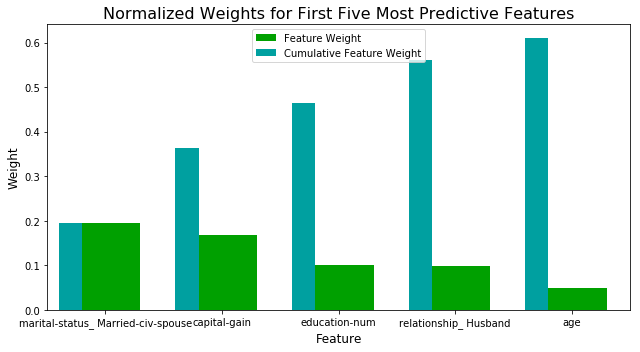

In [82]:
# TODO: Import a supervised learning model that has 'feature_importances_'


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model =best_clf # i will use the best estimator from the previous code

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_ 

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:** <br>
- these features, although slightly different, still are relative to mine because they show that social status and capital gain are the main factors in philanthropy
- visuals affirmed my hypothesis, while there is some difference in the ranking of features.
- I have to admit that I was surprised that age played a big facotr, and I further want study the relation between age vs donation to see how the age affect this process.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics (فهمى يعنى هنقلل وقت التدريب و الاستنتاج لكن دا هيسبب تقليل الدقة فى الاستنتاج لإن فى سمات أهملناها). From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [83]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8500
F-score on testing data: 0.7168

Final Model trained on reduced data
------
Accuracy on testing data: 0.8448
F-score on testing data: 0.7024


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**
- they decreased very slightly (0.005 reduction in accuracy and 0.01 reduction in f-score)
- of course I would consider using thre reduced data if the training time was a factor. (also because this is not life critical project)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Before You Submit
You will also need run the following in order to convert the Jupyter notebook into HTML, so that your submission will include both files.